# Импорт библиотек и подгрузка данных

In [7]:
# импортируем библиотеки для работы с данными, математических преобразований
# и для визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# читаем в переменную датасет для работы с данными
sber_data = pd.read_csv('data/sber_data.csv', sep=',')

# выведем среднее арифметическое значение столбцов с пропусками 
# для того чтобы увидеть сколько процентов пропусков имеется в признаке
cols_null_percent = sber_data.isnull().mean() * 100
# для лучшего понимания отсортируем данные с верху вниз 
# и уберем признаки у которых значение 0 
# для того чтобы начать обрабатывать только столбцы с пропусками
cols_with_null = cols_null_percent[cols_null_percent > 0].\
    sort_values(ascending=False)

# Методы обработки пропущенных значений

## Отбрасывание записей и прзнаков

### .dropna()

    axis — ось, по которой производится удаление (по умолчанию 0 — строки).
    how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
    thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем n-2, где n — число признаков (если axis = 0).

In [6]:
# создаю копию исходной таблицы для того чтобы исходная всегда была целая
drop_data = sber_data.copy()
# оставляем 70 процентов всех записей для того использовать 
# эту информацию в качестве аргумента для удаления столбцов
thresh = drop_data.shape[0] * 0.7
# избавляемся от столбцов у которых 30 и более процентов пустых записей
drop_data = drop_data.dropna(thresh=thresh, axis=1)
# удаляем строки у которых есть 1 и более пропусков
drop_data = drop_data.dropna(how='any', axis=0)
# отображаем результирующую долю пропусков
drop_data.isnull().mean()
# видим, что потеряли 3 долю всех записей
print(drop_data.shape)

(20888, 60)


## Заполнение недостающих данных константами

array([[<AxesSubplot: title={'center': 'hospital_beds_raion'}>,
        <AxesSubplot: title={'center': 'preschool_quota'}>,
        <AxesSubplot: title={'center': 'school_quota'}>],
       [<AxesSubplot: title={'center': 'life_sq'}>,
        <AxesSubplot: title={'center': 'floor'}>,
        <AxesSubplot: title={'center': 'metro_min_walk'}>],
       [<AxesSubplot: title={'center': 'metro_km_walk'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_km'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

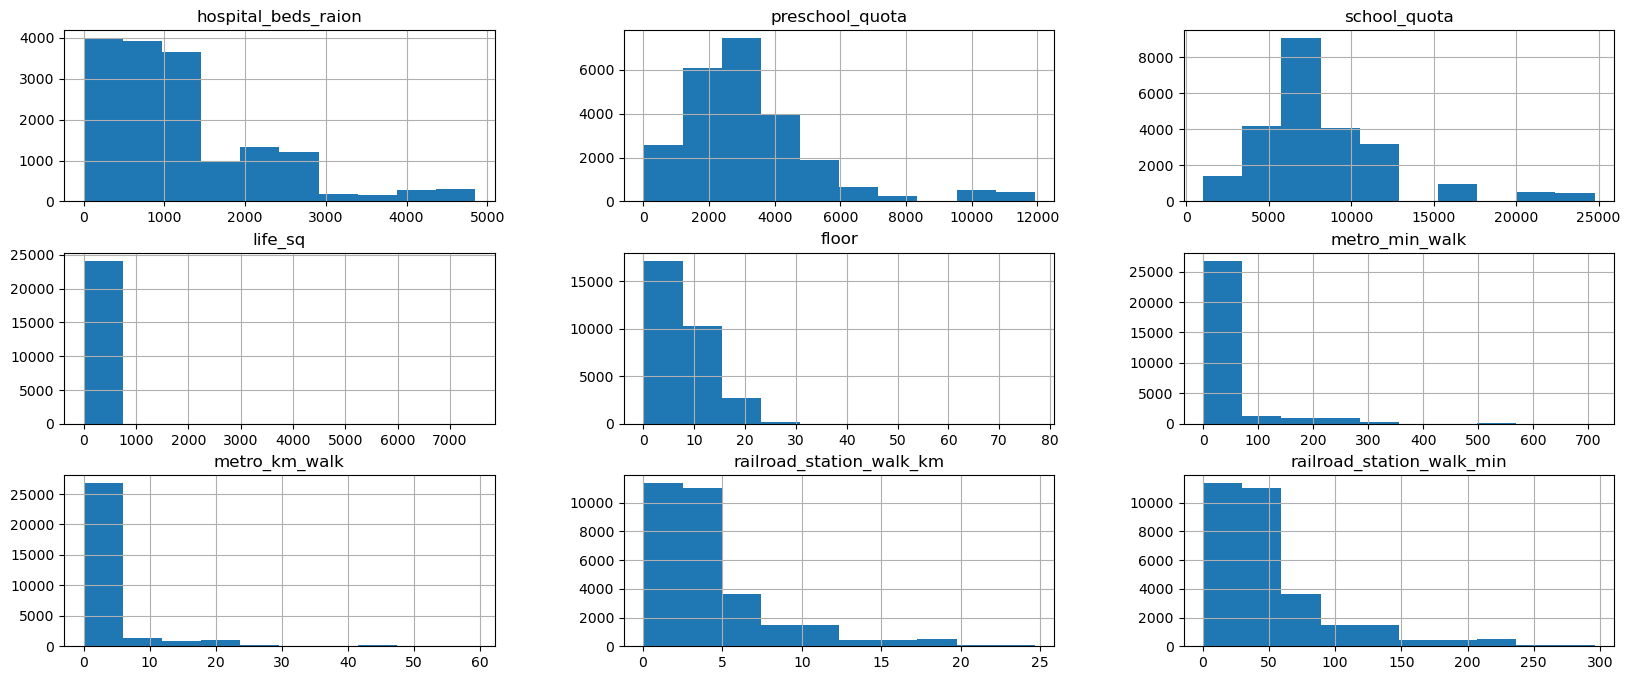

In [ ]:
# посмотрим на распределение признаков с пустыми значениями, 
# чтобы после заполнения константами заметить как исказились данные
# выделяем столбцы с пустыми значениями, 
# чтобы построить через pandas все гистограммы одновременно
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8))

### .fillna()

In [10]:
cols_with_null.index

Index(['hospital_beds_raion', 'preschool_quota', 'school_quota', 'life_sq',
       'floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min'],
      dtype='object')

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

array([[<AxesSubplot: title={'center': 'hospital_beds_raion'}>,
        <AxesSubplot: title={'center': 'preschool_quota'}>,
        <AxesSubplot: title={'center': 'school_quota'}>],
       [<AxesSubplot: title={'center': 'life_sq'}>,
        <AxesSubplot: title={'center': 'floor'}>,
        <AxesSubplot: title={'center': 'metro_min_walk'}>],
       [<AxesSubplot: title={'center': 'metro_km_walk'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_km'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

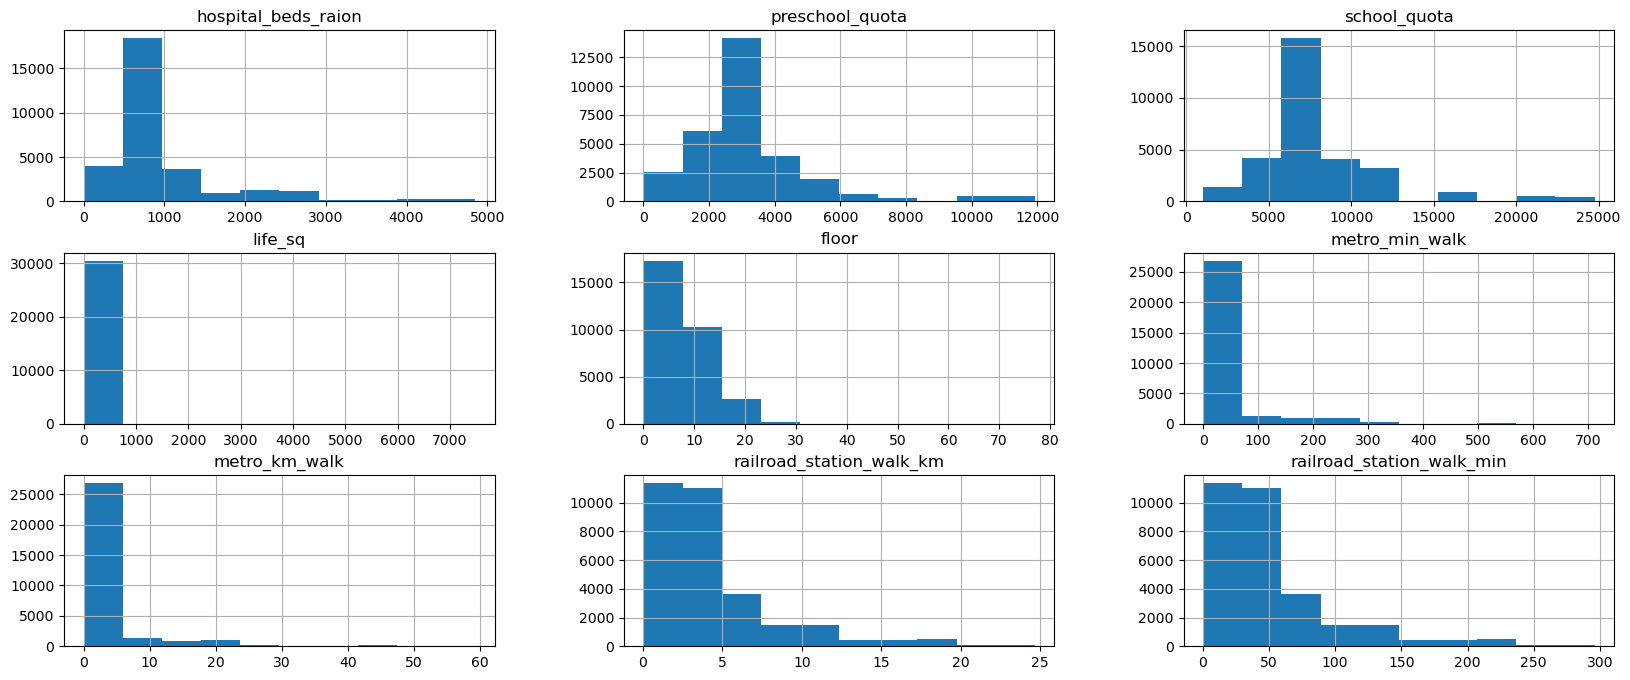

In [16]:
# создаем копию, чтобы не потерять исходную таблицу
fill_data = sber_data.copy()
# создаем словарь для ввода в метода .fillna(), 
# чтобы заменить пропуски константами
values = {
    # полностью копируем данные из одного признака 
    # и помещаем эти данные в пробелы другого прихнака
    'life_sq': fill_data['full_sq'],
    # в пустых значениях этих признаков константой будет мединна
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min']\
        .median(),
    # для дискретных значений у которых распределение в основном не на отметке 0
    # константой ставим моду
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0]
}
# заменяем пустые значения
fill_data = fill_data.fillna(values)
# смотрим на долю пропусков
display(fill_data.isnull().mean())
# смотрим на то как изменились признаки, чтобы увидеть где мы нафантазировали
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8))

## Заполнение недостающих данных константами с добвлением индикатора

In [23]:
# не теряем  данные и создаем копию
indicator_data = sber_data.copy()
# проходимся циклом и добавлем новые признаки индикаторы 
# для помощи в обучении модели
# рассматриваем только признаки с пробелами
for col in cols_with_null.index:
    # обрабатываем копию исхоной таблицы 
    # для того чтобы у столбцов с пробелами были индикаторы
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
# создаем словарь для ввода в метода .fillna(), 
# чтобы заменить пропуски константами
values = {
    # полностью копируем данные из одного признака 
    # и помещаем эти данные в пробелы другого прихнака
    'life_sq': indicator_data['full_sq'],
    # в пустых значениях этих признаков константой будет мединна
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min']\
        .median(),
    # для дискретных значений у которых распределение в основном не на отметке 0
    # константой ставим моду
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0]
}
# заменяем пустые значения
indicator_data = indicator_data.fillna(values)
# смотрим на долю пропусков
display(indicator_data.isnull().mean())
# уюеждаемся, что признаки-индикаторы были добавленны
display(indicator_data.head())

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


## Комбинирование методов


    удалить столбцы, в которых более 30 % пропусков;
    удалить записи, в которых более двух пропусков одновременно;
    заполнить оставшиеся ячейки константами.


In [27]:
# создаем копию для созранения исходного датафрейма
combine_data = sber_data.copy()
# удалем стролбцы если порок больше 30 процентов
n = combine_data.shape[0]
thresh = n * 0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)
# удалем записи если пропусков больше двух
m = combine_data.shape[1]
thresh = m - 2
combine_data = combine_data.dropna(thresh=thresh, axis=0)
# создаем словарь для ввода в метода .fillna(), 
# чтобы заменить пропуски константами
values = {
    # полностью копируем данные из одного признака 
    # и помещаем эти данные в пробелы другого прихнака
    'life_sq': combine_data['full_sq'],
    # в пустых значениях этих признаков константой будет мединна
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min']\
        .median(),
    # для дискретных значений у которых распределение в основном не на отметке 0
    # константой ставим моду
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0]
}
# заменяем пустые значения
combine_data = combine_data.fillna(values)
# смотрим на долю пропусков
display(combine_data.isnull().mean())
# смотрим, что комбинированный методо сохранил больше строк
display(combine_data.shape)



id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)

In [33]:
# узнаем количество пропусков в таблицу sber_data
sber_data['hospital_beds_raion'].isnull().sum()
sber_data['floor'].mode()[0]

3.0